# Linear Regression is essentially just a best fit line. Given a set of data the algorithm will create a best fit line through those data points.

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [4]:
data = pd.read_csv("student-mat.csv", sep=";")
# Since our data is seperated by semicolons we need to do sep=";"

In [5]:
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [6]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [10]:
predict = "G3"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels

/var/folders/qw/g_psycf54375h2n5z0v3zgp00000gn/T/ipykernel_29043/2762412515.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data.drop([predict], 1)) # Features


In [9]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

In [11]:
linear = linear_model.LinearRegression()

In [28]:
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test) # acc stands for accuracy 

In [13]:
print(acc)

0.9346686077806248


In [14]:
print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

Coefficient: 
 [ 0.16025426  0.97355299 -0.18415643 -0.26352728  0.04537905]
Intercept: 
 -1.549988380865079


In [17]:
predictions = linear.predict(x_test) # Gets a list of all predictions

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

14.399986071841811 [13 15  4  0  0] 15
6.106467382948984 [7 7 3 0 6] 7
12.591442544141442 [11 13  2  0  2] 10
10.139671627653897 [ 9 11  3  0  2] 16
11.364451908071876 [12 12  4  0  1] 11
7.254302087296681 [8 8 1 1 4] 12
8.90000877648683 [10  9  2  0 10] 15
9.464935344963305 [ 8 10  1  0  4] 13
7.034856241008267 [9 8 4 0 2] 13
9.371537027878512 [ 8 10  2  0  6] 14
6.978259886534044 [9 8 1 3 6] 10
6.982911807452309 [ 9  7  2  1 20] 11
10.644336570689687 [11 11  2  0  2] 6
18.169720659807126 [16 18  2  0  0] 0
12.461684769800062 [14 12  2  0 10] 13
15.179565550728798 [15 15  2  0  2] 17
12.637036524858047 [13 13  3  0  0] 10
6.4168862646456 [8 7 1 1 7] 11
6.837812673417771 [ 7  7  1  0 14] 11
13.977600401378767 [11 12  2  0 54] 9
7.72367761051205 [11  8  2  0  2] 0
9.7641819010486 [11 10  1  0  0] 13
11.230525099648661 [ 8 12  1  0  0] 0
4.466925157467247 [ 6  5  1  1 14] 6
3.647461965316854 [6 5 2 1 0] 19
14.206012564002917 [15 14  2  0  2] 13
9.577385266879014 [11 10  3  0  4] 14
9.389

In [19]:
#Import Libraries
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

# Saving Our Model 

# We use pickle.dump()

In [23]:
with open("studentgrades.pickle", "wb") as f:
    pickle.dump(linear, f)

# linear is the name of the model we created in the last tutorial
# it should be defined above this

# Loading our model

In [24]:
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

# Now we can use linear to predict grades like before

# Training Multiple Models

In [29]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))
    
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

TypeError: Singleton array array(39) cannot be considered a valid collection.

# Load model

No handles with labels found to put in legend.


-------------------------
Coefficient: 
 [ 0.16025426  0.97355299 -0.18415643 -0.26352728  0.04537905]
Intercept: 
 -1.549988380865079
-------------------------
14.399986071841811 [13 15  4  0  0] 15
6.106467382948984 [7 7 3 0 6] 7
12.591442544141442 [11 13  2  0  2] 10
10.139671627653897 [ 9 11  3  0  2] 16
11.364451908071876 [12 12  4  0  1] 11
7.254302087296681 [8 8 1 1 4] 12
8.90000877648683 [10  9  2  0 10] 15
9.464935344963305 [ 8 10  1  0  4] 13
7.034856241008267 [9 8 4 0 2] 13
9.371537027878512 [ 8 10  2  0  6] 14
6.978259886534044 [9 8 1 3 6] 10
6.982911807452309 [ 9  7  2  1 20] 11
10.644336570689687 [11 11  2  0  2] 6
18.169720659807126 [16 18  2  0  0] 0
12.461684769800062 [14 12  2  0 10] 13
15.179565550728798 [15 15  2  0  2] 17
12.637036524858047 [13 13  3  0  0] 10
6.4168862646456 [8 7 1 1 7] 11
6.837812673417771 [ 7  7  1  0 14] 11
13.977600401378767 [11 12  2  0 54] 9
7.72367761051205 [11  8  2  0  2] 0
9.7641819010486 [11 10  1  0  0] 13
11.230525099648661 [ 8 12  1 

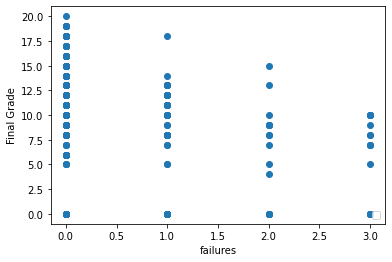

In [30]:
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)


print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])


# Drawing and plotting model
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()